In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("/kaggle/input/business-funding-data-in-indonesia/ImportExport Trade data Asia.csv")
data

,DATE,IMPORTER NAME,IMPORTER ADDRESS,SUPPLIER NAME,SUPPLIER ADDRESS,DECLARANT NAME,DECLARANT ADDRESS,EXPORT COUNTRY,ORIGIN COUNTRY,HS CODE,...,EXCHANGE RATE,DELIVERY TERMS,MODE OF TRANSPORT,PORT OF UNLOADING,PORT OFFICE NAME,CHAPTER,HEADING,SUB HEADING,MONTH,YEAR
0,29-Aug-2020,ADIB ENTERPRISE,"Plot No-89, Said Grand Center, (7thFloor), Sec...",JP Zwagemaker,NETHERLANDS,SURMA ENTERPRISE,"F-48, MUKTIJODDHA SHOPPING COMPLEX,ASHKONA, DHAKA",Netherlands,Netherlands,1063200,...,97.8637,CFR,Air,Dhaka,Dhaka Customs House,1,106,10632,August,2020
1,19-Aug-2020,KARIM TRADERS,"7 No Rajar Goli, Sylhet; KotwaliPS; Sylhet- 31...",ZINGELA FORWARDERS,"UNIT 13 BRENTWOOD BUSINESS PARK, BENONI, SOUTH...",MART INTERNATIONAL,"321/2, ASHKONA, DAKHIN KHAN, DHAKA-",South Africa,South Africa,1063200,...,84.9500,CPT,Air,Dhaka,Dhaka Customs House,1,106,10632,August,2020
2,19-Aug-2020,KHANDAKER TRADE INTERNATIONAL,"Ridge Ahmed Square, 50/1 NayaPaltan, Inner Cir...",INSHA LTD,TAIWAN,SURMA ENTERPRISE,"F-48, MUKTIJODDHA SHOPPING COMPLEX,ASHKONA, DHAKA",Taiwan,Taiwan,1063900,...,84.9500,CFR,Air,Dhaka,Dhaka Customs House,1,106,10639,August,2020
3,19-Aug-2020,KARIM TRADERS,"7 No Rajar Goli, Sylhet; KotwaliPS; Sylhet- 31...",ZINGELA FORWARDERS,"UNIT 13 BRENTWOOD BUSINESS PARK , BENONI SOUTH...",MART INTERNATIONAL,"321/2, ASHKONA, DAKHIN KHAN, DHAKA-",South Africa,South Africa,1063900,...,84.9500,CPT,Air,Dhaka,Dhaka Customs House,1,106,10639,August,2020
4,19-Aug-2020,AZMERI TRADING,"Plot # 34. H.M. Plaza, Road # 02.,Sector # 03,...",SAREFA,"STILTIYESSTROAT 1006, THEHAGUE NETHERLANDS",DIBA TRADING LTD,"PLOT-2505, ASHKONA, DAKSHINKHANDHAKA-1230",Netherlands,Netherlands,1063900,...,97.8637,CFR,Air,Dhaka,Dhaka Customs House,1,106,10639,August,2020
5,23-Aug-2020,INCEPTA VACCINE LIMITED CHANGED FRO,changed from INCEPTA SPECIALTIES PHARMALIMITED...,THAI SPF CO LTD,"365 MOO 3 SARIKA A MUANG, NAKORN NAYORK, 26000...",S.G.S COMPANY,"392,KAWLAR UTTARADHAKA",Thailand,Thailand,4071900,...,84.9500,CFR,Air,Dhaka,Dhaka Customs House,4,407,40719,August,2020
6,16-Aug-2020,ZISHAN CORPORATION LIMITED,"Khayer Tala, Kaligonj; Naldanga PS;Jhenaidah- ...",XIAMEN FRIENDSHIP BRIDGE4 CO.LTD,CHINA,J. R. INTERNATIONAL,225 MIDDLE FAIDABADFAIDABAD MADRASHA,China,China,6022000,...,84.9500,CFR,Air,Dhaka,Dhaka Customs House,6,602,60220,August,2020
7,16-Aug-2020,SUPREM EXPORT,"175,Ghosh Para Puratan Kasba,Jashore.; Jessore...",MAA TARA EXPORT,"BAGDA ROAD, MOTIGONGBONGAON, NORTH 24 PGSWEST ...",SUPREME ASSOCIATE,MD. TOSIRULBENAPOLE,India,India,6022000,...,84.9500,CFR,Road,Jessore,Benapole Custom House,6,602,60220,August,2020
8,20-Aug-2020,KRISHI BEED UPAKARAN NURSERY,KRISHI KHAMAR SARAKFARMGATE DHAKA-1215.,PRAN INTERNATIONAL,"BALIADANGA, PO & PS-KALIACHAKDIST. MALDA, PIN-...",RIMON TRADING LTD.,MD. JULFIKAR ALI RANABENAPOLE,India,India,6022000,...,84.9500,CFR,Road,Jessore,Benapole Custom House,6,602,60220,August,2020
9,16-Aug-2020,SUPREM EXPORT,"175,Ghosh Para Puratan Kasba,Jashore.; Jessore...",MAA TARA EXPORT,"BAGDA ROAD, MOTIGONGBONGAON, NORTH 24 PGSWEST ...",SUPREME ASSOCIATE,MD. TOSIRULBENAPOLE,India,India,6024000,...,84.9500,CFR,Road,Jessore,Benapole Custom House,6,602,60240,August,2020


In [5]:
data.columns  # Untuk melihat semua kolom yang tersedia

Index(['DATE', 'IMPORTER NAME', 'IMPORTER ADDRESS', 'SUPPLIER NAME',
       'SUPPLIER ADDRESS', 'DECLARANT NAME', 'DECLARANT ADDRESS',
       'EXPORT COUNTRY', 'ORIGIN COUNTRY', 'HS CODE', 'PRODUCT DESCRIPTION',
       'PACKAGE UNIT NAME', 'UNIT', 'TOTAL PACKAGES', 'QUANTITY', 'ITEMS',
       'ITEM NO', 'NO OF PACKAGES ITEM', 'GROSS WEIGHT KG', 'NET WEIGHT KG',
       'DECLARED UNIT PRICE FC', 'ASSESSABLE UNIT PRICE FC', 'ITEM PRICE FC',
       'TOTAL INVOICE VALUE FC', 'CURRENCY', 'TOTAL VALUE BDT',
       'TOTAL VALUE USD', 'TOTAL TAX BDT', 'TOTAL DECLARATION',
       'TOTAL OTHER COSTS', 'EXCHANGE RATE', 'DELIVERY TERMS',
       'MODE OF TRANSPORT', 'PORT OF UNLOADING', 'PORT OFFICE NAME', 'CHAPTER',
       'HEADING', 'SUB HEADING', 'MONTH', 'YEAR'],
      dtype='object')

In [10]:
# Mengelompokkan data berdasarkan negara ekspor dan menghitung total nilai ekspor
export_summary = data.groupby('EXPORT COUNTRY')['TOTAL VALUE USD'].sum().reset_index()

# Mengurutkan negara berdasarkan nilai ekspor terbesar
export_summary = export_summary.sort_values(by='TOTAL VALUE USD', ascending=False)

# Menampilkan 10 negara dengan nilai ekspor terbesar
top_exporting_countries = export_summary.head(10)
top_exporting_countries

,EXPORT COUNTRY,TOTAL VALUE USD
0,Belgium,353876.72
5,Malaysia,81078.00
12,United Kingdom,32140.81
4,Indonesia,28800.00
7,Singapore,11250.00
2,France,8284.38
6,Netherlands,5095.84
10,Thailand,3720.00
1,China,2663.00
3,India,1330.00


In [11]:
# Mengelompokkan data berdasarkan negara asal dan menghitung total nilai impor
import_summary = data.groupby('ORIGIN COUNTRY')['TOTAL VALUE USD'].sum().reset_index()

# Mengurutkan negara berdasarkan nilai impor terbesar
import_summary = import_summary.sort_values(by='TOTAL VALUE USD', ascending=False)

# Menampilkan 10 negara dengan nilai impor terbesar
top_importing_countries = import_summary.head(10)
top_importing_countries


,ORIGIN COUNTRY,TOTAL VALUE USD
5,Netherlands,355196.42
4,Malaysia,81078.00
11,United Kingdom,32140.81
3,Indonesia,28800.00
1,France,12060.52
6,Singapore,11250.00
9,Thailand,3720.00
0,China,2663.00
2,India,1330.00
7,South Africa,1220.00


In [12]:
# Menggabungkan data ekspor dan impor untuk setiap negara
trade_summary = pd.merge(export_summary, import_summary, left_on='EXPORT COUNTRY', right_on='ORIGIN COUNTRY', how='outer', suffixes=('_EXPORT', '_IMPORT'))

# Menambahkan kolom total perdagangan (ekspor + impor)
trade_summary['TOTAL TRADE USD'] = trade_summary['TOTAL VALUE USD_EXPORT'].fillna(0) + trade_summary['TOTAL VALUE USD_IMPORT'].fillna(0)

# Mengurutkan berdasarkan total nilai perdagangan terbesar
trade_summary = trade_summary.sort_values(by='TOTAL TRADE USD', ascending=False)

# Menampilkan 10 negara dengan total perdagangan terbesar
top_trading_countries = trade_summary.head(10)
top_trading_countries

,EXPORT COUNTRY,TOTAL VALUE USD_EXPORT,ORIGIN COUNTRY,TOTAL VALUE USD_IMPORT,TOTAL TRADE USD
6,Netherlands,5095.84,Netherlands,355196.42,360292.26
0,Belgium,353876.72,NaN,NaN,353876.72
5,Malaysia,81078.00,Malaysia,81078.00,162156.00
12,United Kingdom,32140.81,United Kingdom,32140.81,64281.62
4,Indonesia,28800.00,Indonesia,28800.00,57600.00
7,Singapore,11250.00,Singapore,11250.00,22500.00
2,France,8284.38,France,12060.52,20344.90
10,Thailand,3720.00,Thailand,3720.00,7440.00
1,China,2663.00,China,2663.00,5326.00
3,India,1330.00,India,1330.00,2660.00


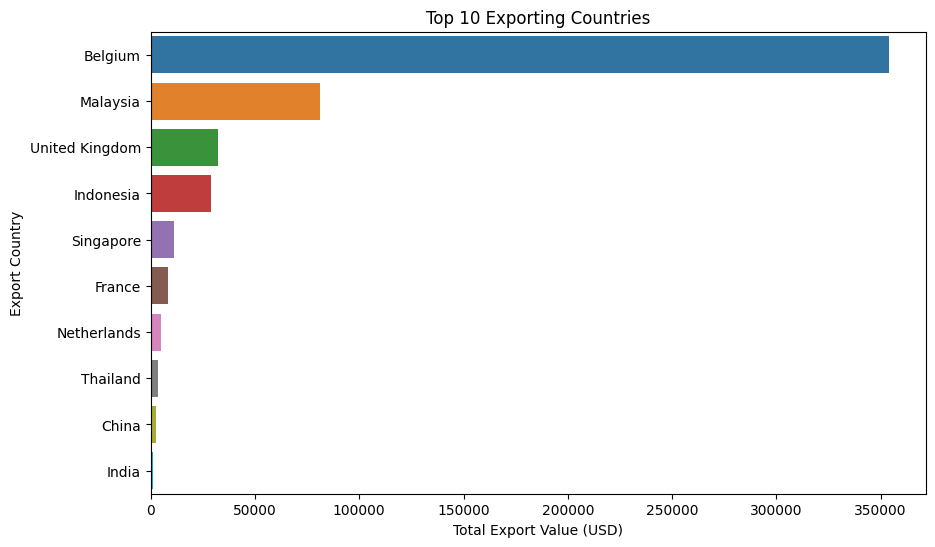

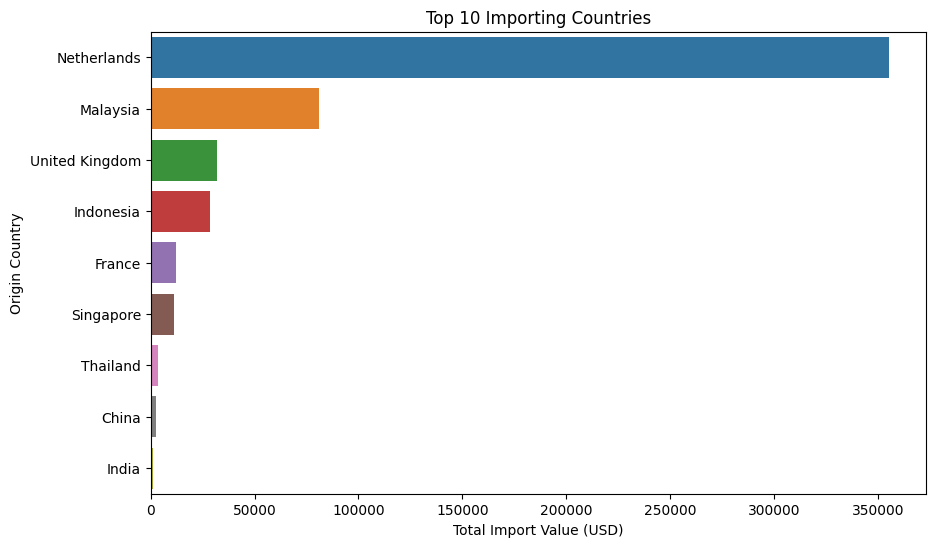

In [16]:
# Visualisasi 10 negara dengan nilai ekspor terbesar
plt.figure(figsize=(10,6))
sns.barplot(x='TOTAL VALUE USD_EXPORT', y='EXPORT COUNTRY', data=top_trading_countries.sort_values(by='TOTAL VALUE USD_EXPORT', ascending=False))
plt.title('Top 10 Exporting Countries')
plt.xlabel('Total Export Value (USD)')
plt.ylabel('Export Country')
plt.show()

# Visualisasi 10 negara dengan nilai impor terbesar
plt.figure(figsize=(10,6))
sns.barplot(x='TOTAL VALUE USD_IMPORT', y='ORIGIN COUNTRY', data=top_trading_countries.sort_values(by='TOTAL VALUE USD_IMPORT', ascending=False))
plt.title('Top 10 Importing Countries')
plt.xlabel('Total Import Value (USD)')
plt.ylabel('Origin Country')
plt.show()


In [17]:
# Mengelompokkan data berdasarkan produk dan menghitung total nilai perdagangan (ekspor + impor)
product_summary = data.groupby(['HS CODE', 'PRODUCT DESCRIPTION'])['TOTAL VALUE USD'].sum().reset_index()

# Mengurutkan produk berdasarkan nilai perdagangan tertinggi
product_summary = product_summary.sort_values(by='TOTAL VALUE USD', ascending=False)

# Menampilkan 10 produk dengan nilai perdagangan tertinggi
top_products = product_summary.head(10)
top_products


,HS CODE,PRODUCT DESCRIPTION,TOTAL VALUE USD
13,19019030,Preparations for infant or young children in b...,353876.72
12,15171010,"Margarine, excluding liquid margarine in 10kg ...",59760.00
18,22071000,"Undenatured Ethyl Alcohol, Of Alcoholic Streng...",31297.06
10,8029012,"Betelnuts, Semi-processed betelnuts packed in ...",28800.00
11,15171010,"Margarine, excluding liquid margarine in 10kg ...",21318.00
17,22030000,Beer Made From Malt HEINEKEN BEER (24/330ML CANS),11250.00
15,22011000,"Mineral Waters And Aerated Waters, Unsweetened...",8284.38
14,22011000,"Mineral Waters And Aerated Waters, Unsweetened...",3776.14
5,4071900,Birds Fertilised eggs for incubation EXCL. Of...,3720.00
7,6022000,"Trees,Shrubs,Bushes, Grafted Or Not, Of Kind B...",2663.00


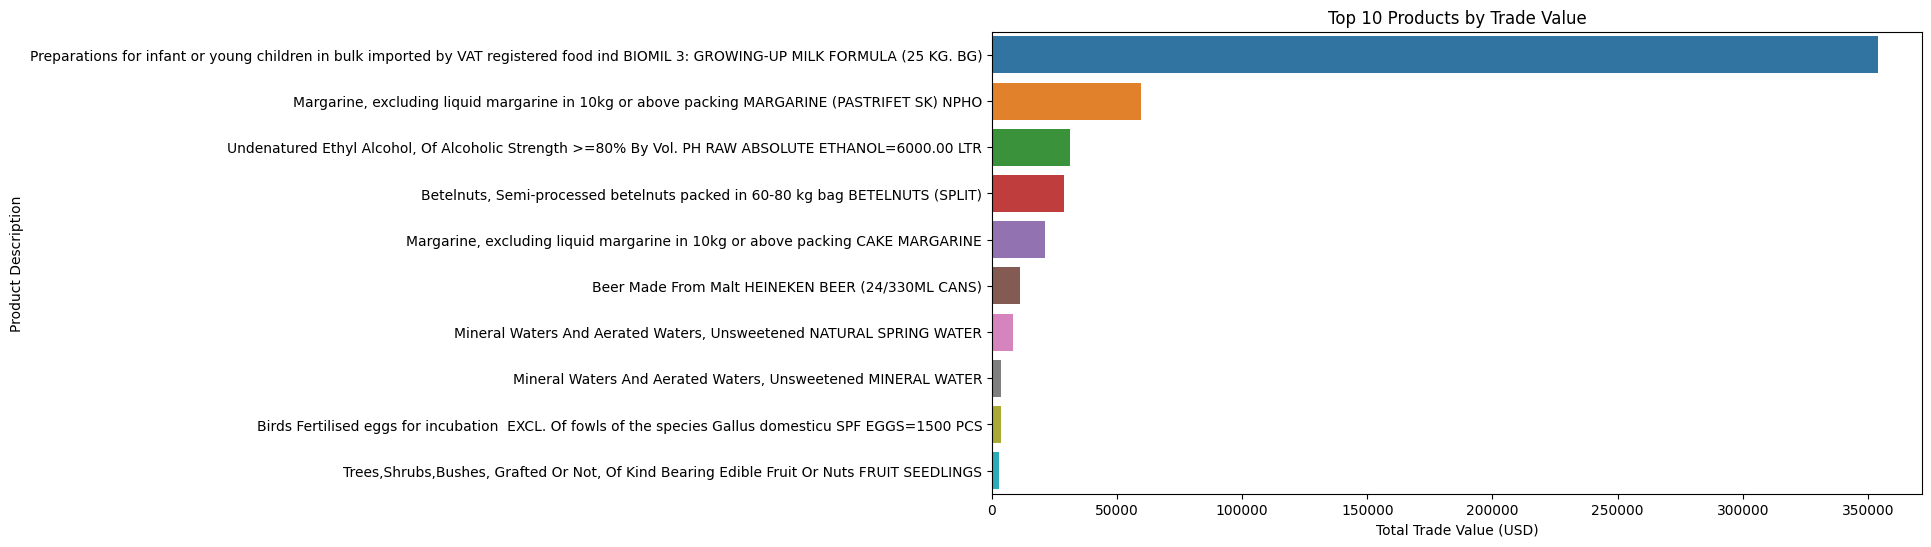

In [18]:
# Visualisasi 10 produk dengan nilai perdagangan tertinggi
plt.figure(figsize=(12,6))
sns.barplot(x='TOTAL VALUE USD', y='PRODUCT DESCRIPTION', data=top_products)
plt.title('Top 10 Products by Trade Value')
plt.xlabel('Total Trade Value (USD)')
plt.ylabel('Product Description')
plt.show()


In [19]:
# Mengelompokkan data berdasarkan negara dan produk untuk menghitung total volume perdagangan
volume_summary = data.groupby(['EXPORT COUNTRY', 'PRODUCT DESCRIPTION']).agg({
    'QUANTITY': 'sum',
    'GROSS WEIGHT KG': 'sum',
    'NET WEIGHT KG': 'sum'
}).reset_index()

# Mengurutkan berdasarkan total berat bersih (NET WEIGHT KG) tertinggi
volume_summary = volume_summary.sort_values(by='NET WEIGHT KG', ascending=False)

# Menampilkan 10 negara dan produk dengan volume perdagangan tertinggi
top_volume = volume_summary.head(10)
top_volume


,EXPORT COUNTRY,PRODUCT DESCRIPTION,QUANTITY,GROSS WEIGHT KG,NET WEIGHT KG
0,Belgium,Preparations for infant or young children in b...,72750,74533.50,72750.0
8,Malaysia,"Margarine, excluding liquid margarine in 10kg ...",59760,62299.80,59760.0
2,France,"Mineral Waters And Aerated Waters, Unsweetened...",23094,25207.18,23094.0
7,Malaysia,"Margarine, excluding liquid margarine in 10kg ...",22440,23376.50,22440.0
6,Indonesia,"Betelnuts, Semi-processed betelnuts packed in ...",18,18300.00,18000.0
12,Singapore,Beer Made From Malt HEINEKEN BEER (24/330ML CANS),17820,19125.00,17820.0
9,Netherlands,"Mineral Waters And Aerated Waters, Unsweetened...",11880,12797.00,11880.0
18,United Kingdom,"Undenatured Ethyl Alcohol, Of Alcoholic Streng...",6000,5170.00,4728.0
5,India,"Trees,Shrubs,Bushes, Grafted Or Not, Of Kind B...",1360,3223.20,3223.2
3,India,"Roses, Grafted Or Not CHAINA ROSE",900,2133.00,2133.0


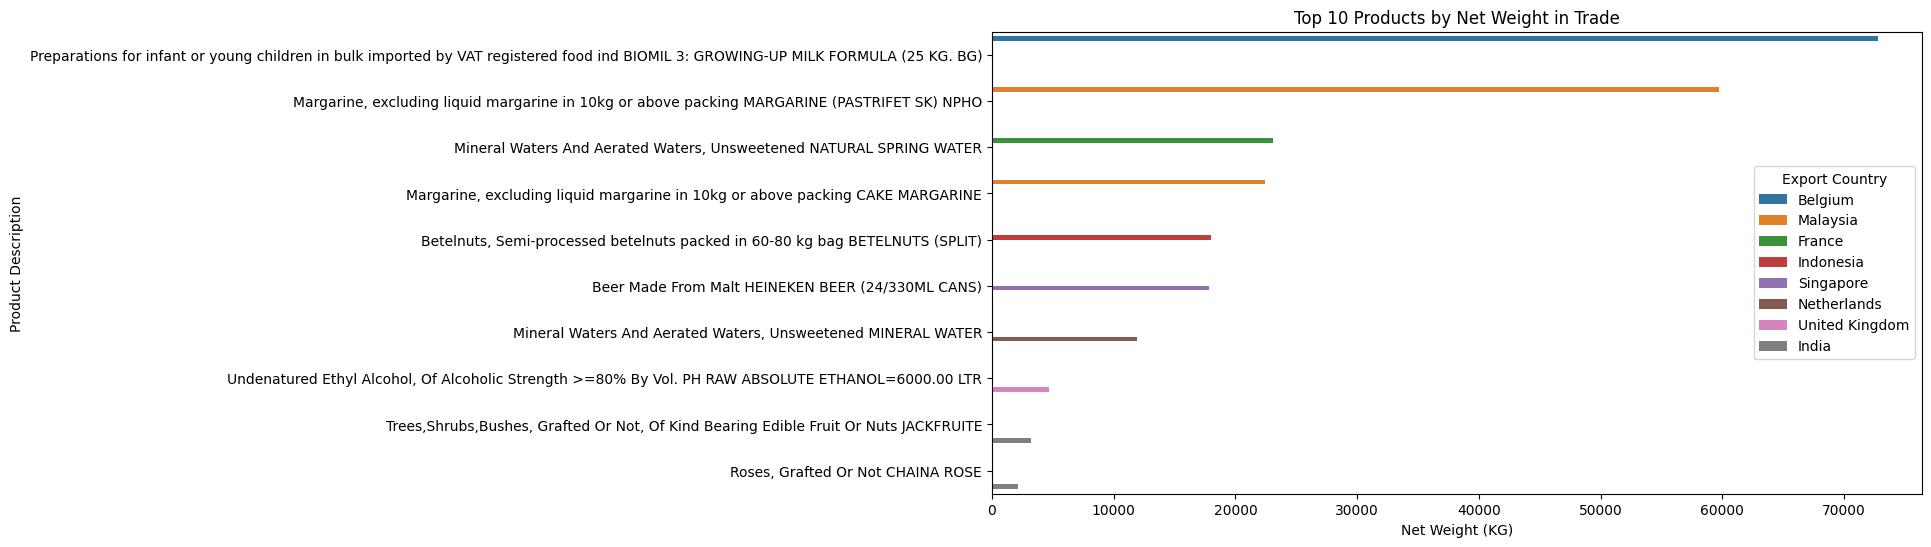

In [20]:
# Visualisasi 10 negara dan produk dengan volume perdagangan tertinggi
plt.figure(figsize=(12,6))
sns.barplot(x='NET WEIGHT KG', y='PRODUCT DESCRIPTION', hue='EXPORT COUNTRY', data=top_volume)
plt.title('Top 10 Products by Net Weight in Trade')
plt.xlabel('Net Weight (KG)')
plt.ylabel('Product Description')
plt.legend(title='Export Country')
plt.show()


In [21]:
# Mengelompokkan nilai total perdagangan untuk setiap negara dan produk
trade_value_summary = data.groupby(['EXPORT COUNTRY', 'PRODUCT DESCRIPTION']).agg({
    'TOTAL VALUE USD': 'sum',
    'TOTAL VALUE BDT': 'sum',
    'EXCHANGE RATE': 'mean'  # Menggunakan rata-rata nilai tukar
}).reset_index()

# Mengurutkan berdasarkan nilai total perdagangan USD tertinggi
trade_value_summary = trade_value_summary.sort_values(by='TOTAL VALUE USD', ascending=False)

# Menampilkan 10 negara dan produk dengan nilai perdagangan tertinggi
top_trade_value = trade_value_summary.head(10)
top_trade_value


,EXPORT COUNTRY,PRODUCT DESCRIPTION,TOTAL VALUE USD,TOTAL VALUE BDT,EXCHANGE RATE
0,Belgium,Preparations for infant or young children in b...,353876.72,30008746.19,93.2573
8,Malaysia,"Margarine, excluding liquid margarine in 10kg ...",59760.00,6214382.69,84.9500
18,United Kingdom,"Undenatured Ethyl Alcohol, Of Alcoholic Streng...",31297.06,2653990.59,108.4582
6,Indonesia,"Betelnuts, Semi-processed betelnuts packed in ...",28800.00,2729835.88,84.9500
7,Malaysia,"Margarine, excluding liquid margarine in 10kg ...",21318.00,2333405.87,84.9500
12,Singapore,Beer Made From Malt HEINEKEN BEER (24/330ML CANS),11250.00,965244.38,84.9500
2,France,"Mineral Waters And Aerated Waters, Unsweetened...",8284.38,702515.62,61.3389
9,Netherlands,"Mineral Waters And Aerated Waters, Unsweetened...",3776.14,320216.87,97.8637
16,Thailand,Birds Fertilised eggs for incubation EXCL. Of...,3720.00,322366.56,84.9500
1,China,"Trees,Shrubs,Bushes, Grafted Or Not, Of Kind B...",2663.00,230769.23,84.9500


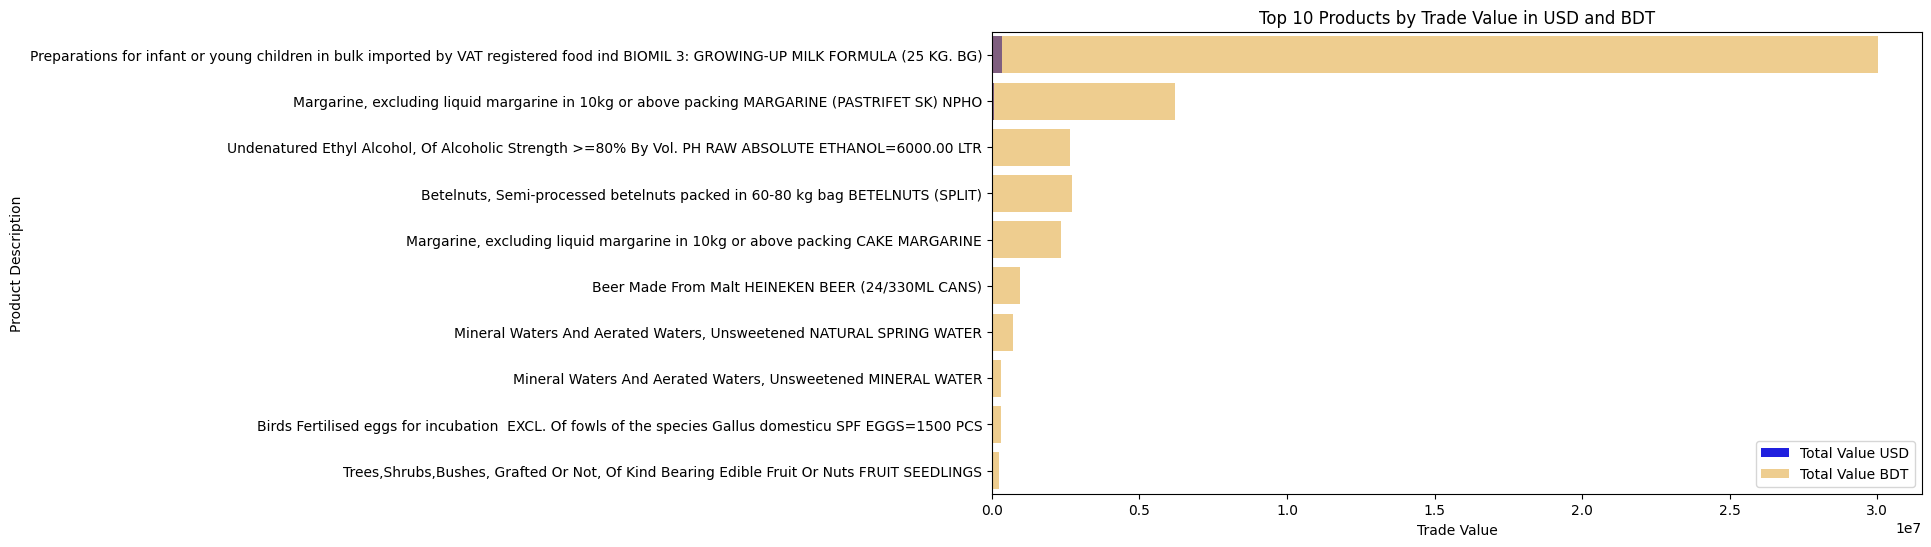

In [22]:
# Visualisasi nilai perdagangan dalam USD dan BDT
plt.figure(figsize=(12,6))
sns.barplot(x='TOTAL VALUE USD', y='PRODUCT DESCRIPTION', data=top_trade_value, color='blue', label='Total Value USD')
sns.barplot(x='TOTAL VALUE BDT', y='PRODUCT DESCRIPTION', data=top_trade_value, color='orange', alpha=0.5, label='Total Value BDT')
plt.title('Top 10 Products by Trade Value in USD and BDT')
plt.xlabel('Trade Value')
plt.ylabel('Product Description')
plt.legend()
plt.show()


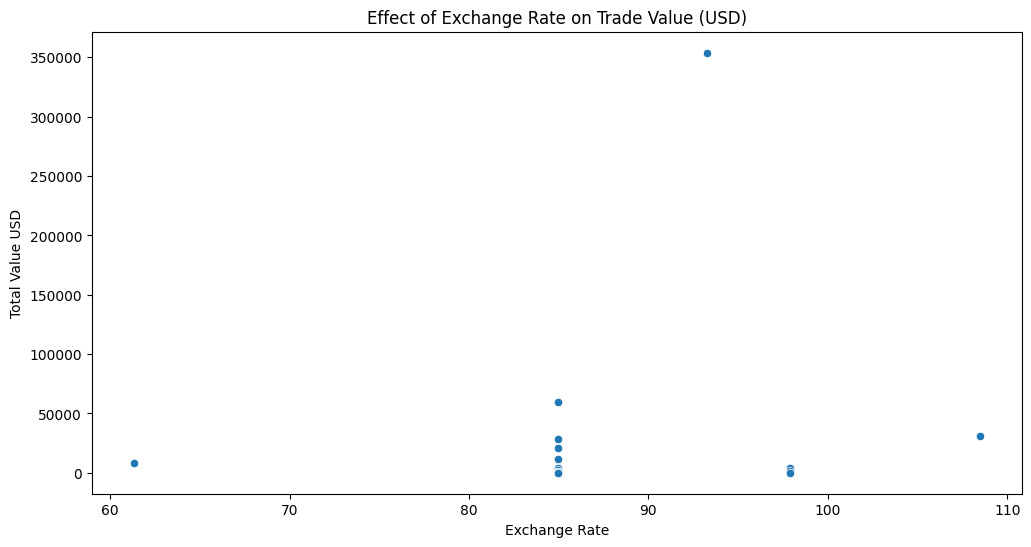

In [23]:
# Visualisasi pengaruh nilai tukar terhadap nilai perdagangan
plt.figure(figsize=(12,6))
sns.scatterplot(x='EXCHANGE RATE', y='TOTAL VALUE USD', data=trade_value_summary)
plt.title('Effect of Exchange Rate on Trade Value (USD)')
plt.xlabel('Exchange Rate')
plt.ylabel('Total Value USD')
plt.show()


In [24]:
# Mengelompokkan data berdasarkan moda transportasi dan pelabuhan untuk menghitung total nilai perdagangan
transport_port_summary = data.groupby(['MODE OF TRANSPORT', 'PORT OF UNLOADING']).agg({
    'TOTAL VALUE USD': 'sum'
}).reset_index()

# Mengurutkan berdasarkan total nilai perdagangan tertinggi
transport_port_summary = transport_port_summary.sort_values(by='TOTAL VALUE USD', ascending=False)

# Menampilkan 10 moda transportasi dan pelabuhan dengan nilai perdagangan tertinggi
top_transport_ports = transport_port_summary.head(10)
top_transport_ports


,MODE OF TRANSPORT,PORT OF UNLOADING,TOTAL VALUE USD
2,Sea,Chittagong,487146.24
0,Air,Dhaka,41313.51
1,Road,Jessore,1330.00


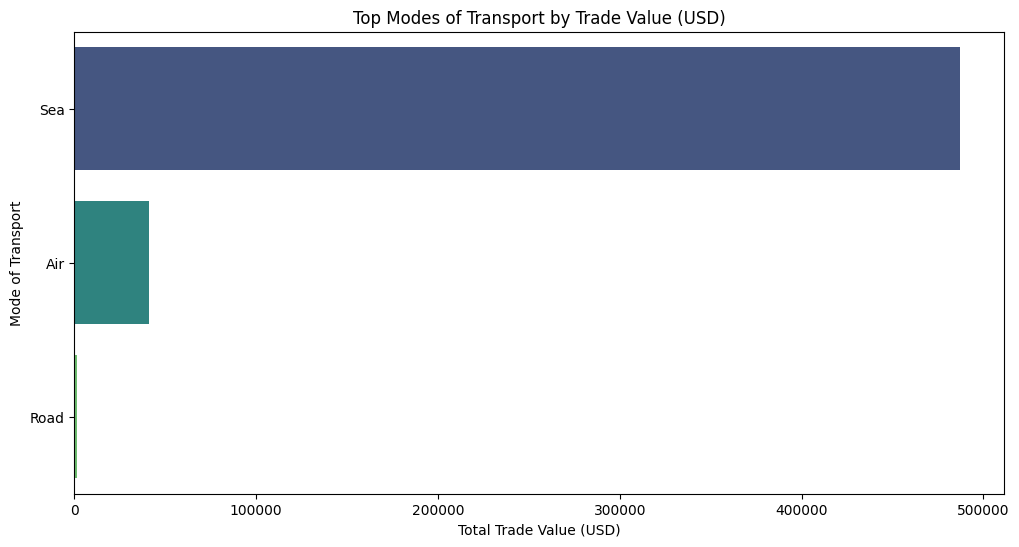

In [25]:
# Visualisasi nilai perdagangan berdasarkan moda transportasi
plt.figure(figsize=(12,6))
sns.barplot(x='TOTAL VALUE USD', y='MODE OF TRANSPORT', data=top_transport_ports, palette='viridis')
plt.title('Top Modes of Transport by Trade Value (USD)')
plt.xlabel('Total Trade Value (USD)')
plt.ylabel('Mode of Transport')
plt.show()


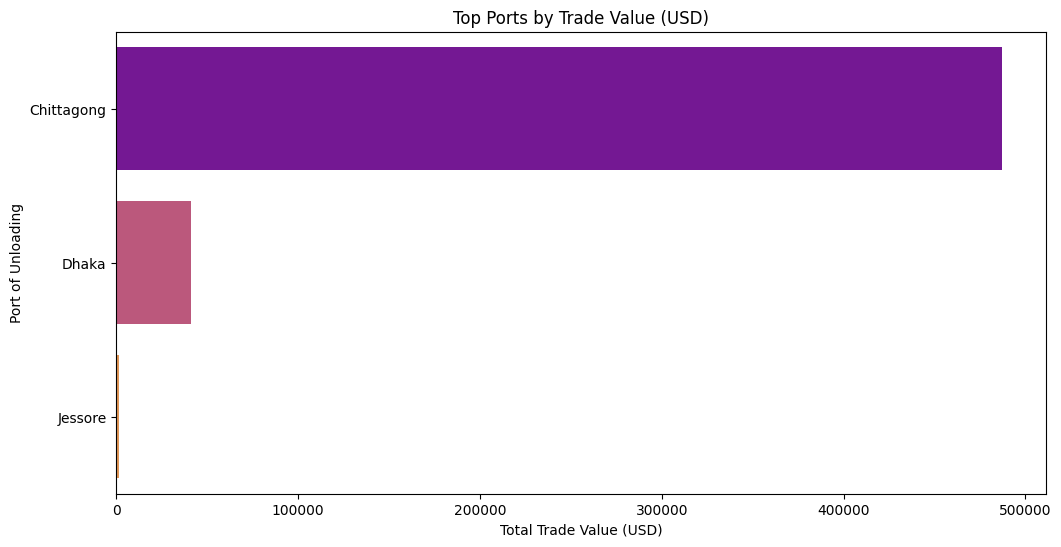

In [29]:
# Mengelompokkan data berdasarkan pelabuhan untuk menghitung total nilai perdagangan
port_summary = data.groupby('PORT OF UNLOADING').agg({
    'TOTAL VALUE USD': 'sum'
}).reset_index()

# Mengurutkan berdasarkan total nilai perdagangan tertinggi
port_summary = port_summary.sort_values(by='TOTAL VALUE USD', ascending=False)

# Menampilkan 10 pelabuhan dengan nilai perdagangan tertinggi
top_ports = port_summary.head(10)

# Visualisasi nilai perdagangan berdasarkan pelabuhan
plt.figure(figsize=(12,6))
sns.barplot(x='TOTAL VALUE USD', y='PORT OF UNLOADING', data=top_ports, palette='plasma')
plt.title('Top Ports by Trade Value (USD)')
plt.xlabel('Total Trade Value (USD)')
plt.ylabel('Port of Unloading')
plt.show()

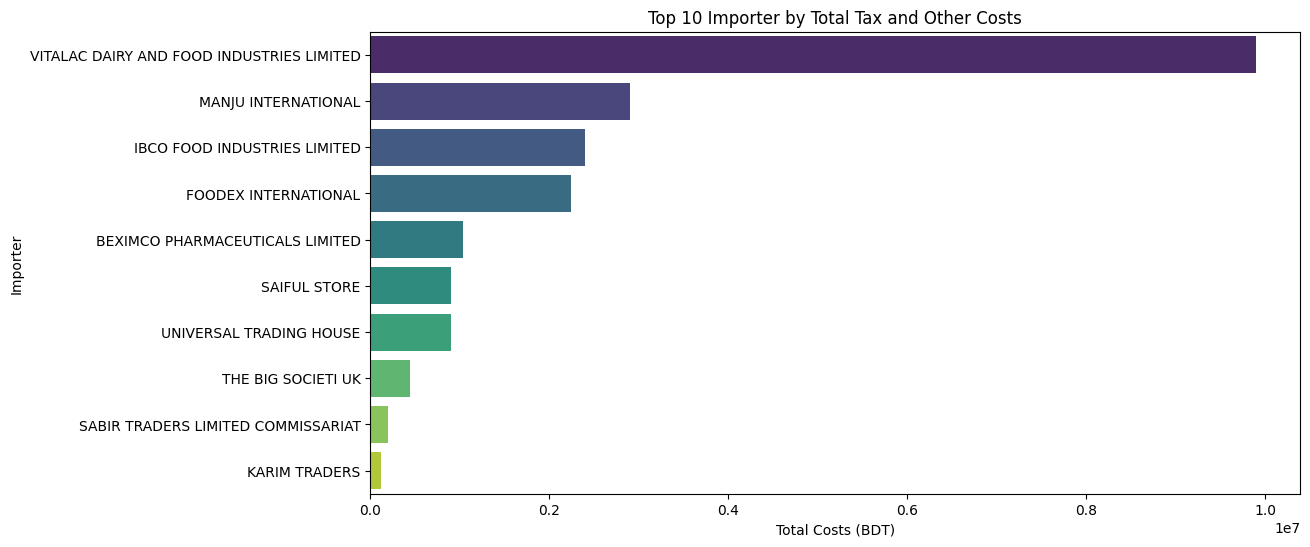

In [31]:
# Menghitung total pajak dan biaya lainnya untuk setiap transaksi
data['TOTAL COST'] = data['TOTAL TAX BDT'] + data['TOTAL OTHER COSTS']

# Menghitung total pajak dan biaya lainnya berdasarkan negara pengimpor
tax_cost_summary = data.groupby('IMPORTER NAME').agg({
    'TOTAL TAX BDT': 'sum',
    'TOTAL OTHER COSTS': 'sum',
    'TOTAL COST': 'sum'
}).reset_index()

# Mengurutkan berdasarkan total biaya terbesar
tax_cost_summary = tax_cost_summary.sort_values(by='TOTAL COST', ascending=False)

# Menampilkan 10 negara dengan pajak dan biaya perdagangan terbesar
top_tax_cost_countries = tax_cost_summary.head(10)

# Visualisasi pajak dan biaya lainnya per negara
plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL COST', y='IMPORTER NAME', data=top_tax_cost_countries, palette='viridis')
plt.title('Top 10 Importer by Total Tax and Other Costs')
plt.xlabel('Total Costs (BDT)')
plt.ylabel('Importer')
plt.show()


Rata-rata Harga Per Unit:
                                   PRODUCT DESCRIPTION  DECLARED UNIT PRICE FC  \
0   Beer Made From Malt HEINEKEN BEER (24/330ML CANS)                  0.6313   
1   Betelnuts, Semi-processed betelnuts packed in ...               1600.0000   
2   Birds Fertilised eggs for incubation  EXCL. Of...                 29.7600   
3   Margarine, excluding liquid margarine in 10kg ...                  0.9500   
4   Margarine, excluding liquid margarine in 10kg ...                  1.0000   
5   Mineral Waters And Aerated Waters, Unsweetened...                  0.2700   
6   Mineral Waters And Aerated Waters, Unsweetened...                  0.2500   
7                         OTHER BIRDS LIVE BUDGERIGAR                  2.5000   
8                               OTHER BIRDS LOVE BIRD                  5.3000   
9                         OTHER BIRDS SILVER PHEASANT                 11.0000   
10  OTHER WATER, EXCL.MINERAL WATERS AND AERATED W...                  0.5000   
1

<Figure size 1200x600 with 0 Axes>

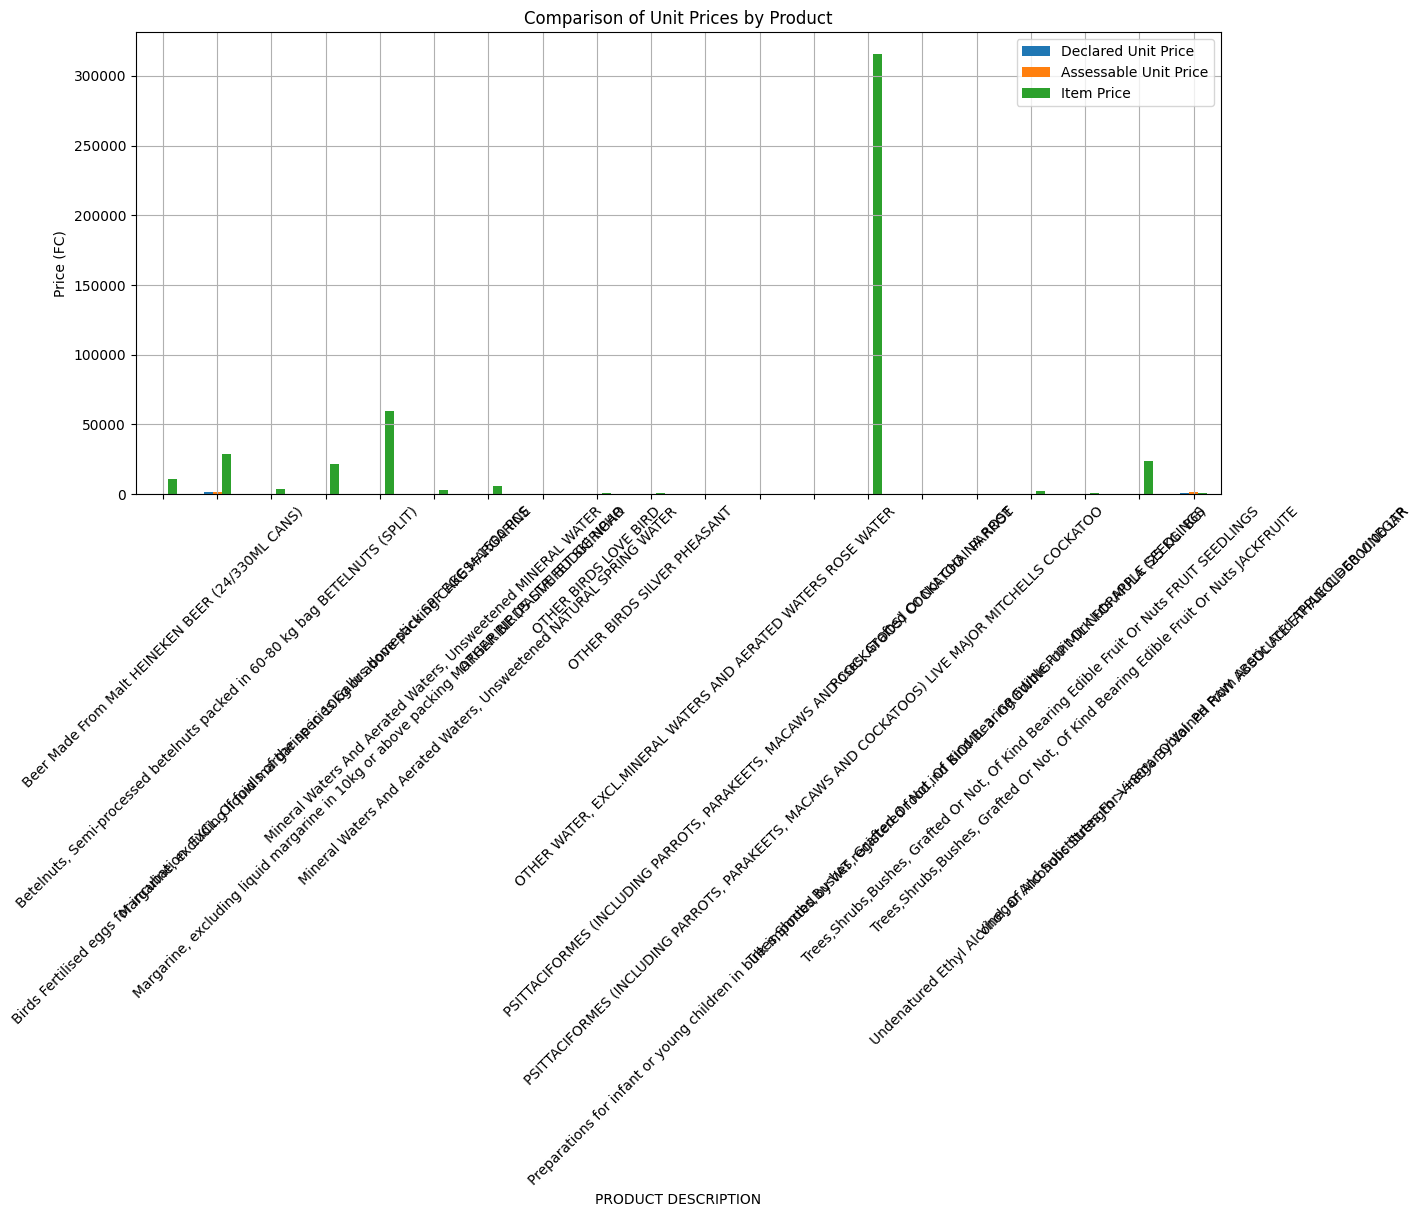

In [33]:
# Mengelompokkan data berdasarkan produk dan menghitung rata-rata harga per unit
price_analysis = data.groupby('PRODUCT DESCRIPTION').agg({
    'DECLARED UNIT PRICE FC': 'mean',
    'ASSESSABLE UNIT PRICE FC': 'mean',
    'ITEM PRICE FC': 'mean'
}).reset_index()

# Menghitung selisih antara harga deklarasi dan harga yang dapat dinilai
price_analysis['PRICE GAP'] = price_analysis['DECLARED UNIT PRICE FC'] - price_analysis['ASSESSABLE UNIT PRICE FC']

# Mengidentifikasi produk dengan harga per unit tertinggi dan terendah
highest_price_product = price_analysis.loc[price_analysis['ITEM PRICE FC'].idxmax()]
lowest_price_product = price_analysis.loc[price_analysis['ITEM PRICE FC'].idxmin()]

# Menampilkan hasil analisis
print("Rata-rata Harga Per Unit:\n", price_analysis)
print("\nProduk dengan Harga Per Unit Tertinggi:\n", highest_price_product)
print("\nProduk dengan Harga Per Unit Terendah:\n", lowest_price_product)

# Visualisasi perbandingan harga per unit
plt.figure(figsize=(12, 6))
price_analysis.set_index('PRODUCT DESCRIPTION')[['DECLARED UNIT PRICE FC', 'ASSESSABLE UNIT PRICE FC', 'ITEM PRICE FC']].plot(kind='bar', figsize=(14, 6))
plt.title('Comparison of Unit Prices by Product')
plt.ylabel('Price (FC)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(["Declared Unit Price", "Assessable Unit Price", "Item Price"])
plt.show()


In [35]:
# Menggabungkan data untuk analisis hubungan antara pengimpor dan pemasok
relationship_analysis = data.groupby(['IMPORTER NAME', 'SUPPLIER NAME']).agg({
    'TOTAL VALUE USD': 'sum'
}).reset_index()

# Mengidentifikasi pengimpor dan pemasok terbesar
relationship_analysis = relationship_analysis.sort_values(by='TOTAL VALUE USD', ascending=False).head(10)

# Menampilkan hasil
print("\nTop Relationships between Importers and Suppliers:")
print(relationship_analysis)



Top Relationships between Importers and Suppliers:
                                IMPORTER NAME  \
16  VITALAC DAIRY AND FOOD INDUSTRIES LIMITED   
5                IBCO FOOD INDUSTRIES LIMITED   
2             BEXIMCO PHARMACEUTICALS LIMITED   
10                        MANJU INTERNATIONAL   
12                               SAIFUL STORE   
11         SABIR TRADERS LIMITED COMMISSARIAT   
4                        FOODEX INTERNATIONAL   
15                    UNIVERSAL TRADING HOUSE   
6         INCEPTA VACCINE LIMITED CHANGED FRO   
17                 ZISHAN CORPORATION LIMITED   

                                        SUPPLIER NAME  TOTAL VALUE USD  
16                                        FASSKA PAR.        353876.72  
5                       LAM SOON EDIBLE OILS SDN. BHD         59760.00  
2                                       EASTWAYS PARK         31297.06  
10                            PT. GLOBAL VISION IMPEX         28800.00  
12            MOI INTERNATIONAL (SINGAPORE)